## Tutorial 4: Edges and image gradient


In this tutorial, we will recall the concepts:

1. Image derivatives
2. Image gradient
3. Sobel vs Prewitt
4. Image Laplacian
5. Canny edge detector
6. Comparison between different edge detectors
7. Edge detection in color images

# Image derivatives

How to obtain the first partial derivative in the direction x?


## Spatial resolution of color images

(389, 449, 4)


/home/pau/.local/lib/python3.8/site-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 7.1.0. Several security issues (CVE-2020-11538, CVE-2020-10379, CVE-2020-10994, CVE-2020-10177) have been fixed in pillow 7.1.0 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


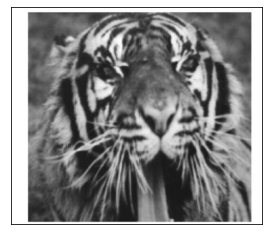

In [1]:
%matplotlib inline

from skimage import io
from matplotlib import pyplot as plt

tigre=io.imread('images/tigre.png')

plt.imshow(tigre)
plt.xticks([])
plt.yticks([])

print(tigre.shape)

In [2]:
import numpy as np
from scipy import ndimage
from skimage import img_as_float
from skimage.color import rgba2rgb, rgb2gray
from skimage.transform import rescale

tigre_f=img_as_float(tigre)
tigre_f=rgba2rgb(tigre_f)
tigre_f=rgb2gray(tigre_f)
tigre_f=rescale(tigre_f,.25) #let's accelerate computation

print(tigre_f.shape)
print(tigre_f.dtype, tigre_f.max())
mask_x=np.array([[-1,1]])

tigre_x=ndimage.convolve(tigre_f,mask_x)

(97, 112)
float64 1.0


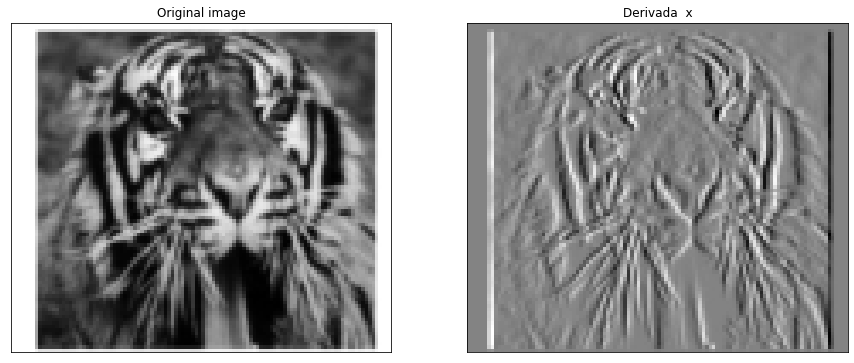

In [3]:
#visualize
def visualize2(tigre_f,tigre_x,label1,label2):
    #visualize
    fig=plt.figure(figsize=(15,15))
    fig.add_subplot(1,2,1)
    plt.title(label1)
    plt.imshow(tigre_f, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    fig.add_subplot(1,2,2)
    plt.title(label2)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(tigre_x, cmap='gray')
    
def visualize3(tigre_f,tigre_x,tigre_xb,label1,label2,label3):
    #visualize
    fig=plt.figure(figsize=(15,15))
    fig.add_subplot(1,3,1)
    plt.title(label1)
    plt.imshow(tigre_f, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    fig.add_subplot(1,3,2)
    plt.title(label2)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(tigre_x, cmap='gray')
    fig.add_subplot(1,3,3)
    plt.xticks([])
    plt.yticks([])
    plt.title(label3)
    plt.imshow(tigre_xb, cmap='gray')


def visualize4(tigre1,tigre2,tigre3,tigre4,label1,label2,label3,label4):
    #visualize
    fig=plt.figure(figsize=(15,15))
    fig.add_subplot(1,4,1)
    plt.title(label1)
    plt.imshow(tigre1, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    fig.add_subplot(1,4,2)
    plt.title(label2)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(tigre2, cmap='gray')
    fig.add_subplot(1,4,3)
    plt.xticks([])
    plt.yticks([])
    plt.title(label3)
    plt.imshow(tigre3, cmap='gray')
    fig.add_subplot(1,4,4)
    plt.xticks([])
    plt.yticks([])
    plt.title(label4)
    plt.imshow(tigre4, cmap='gray')




visualize2(tigre_f,tigre_x,'Original image', 'Derivada  x')

Let's compute the vertical derivative:

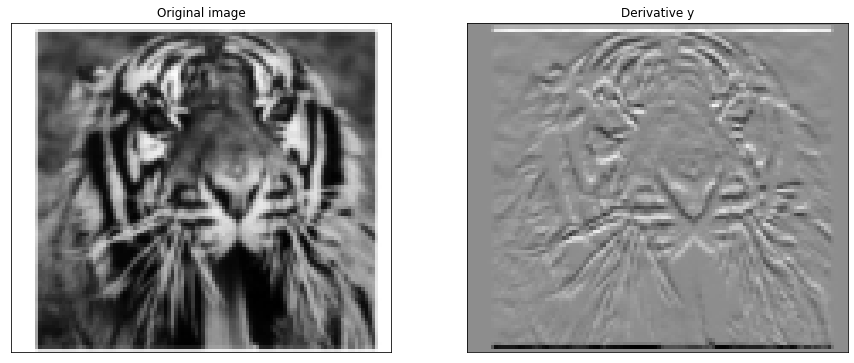

In [4]:
mask_y=np.array([[-1],[1]])

tigre_y=ndimage.convolve(tigre_f,mask_y)

visualize2(tigre_f,tigre_y, 'Original image', 'Derivative y')

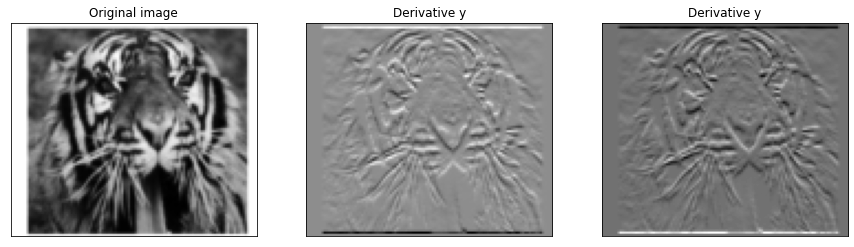

In [5]:
mask_y2=np.array([[1],[-1]]) #invert y axis

tigre_y2=ndimage.convolve(tigre_f,mask_y2)

visualize3(tigre_f,tigre_y, tigre_y2, 'Original image', 'Derivative y', 'Derivative y')

What is the difference between tigre_y1 and tigre_y2?

In [6]:
#Explain it
tigre_y12=tigre_y+tigre_y2
print(tigre_y[0])
print(tigre_y2[0])
print(tigre_y12[0])


[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.49365748e-06  9.42366122e-05
 -1.11304258e-03  7.14107066e-04  1.49229090e-03  3.90637081e-04
  1.08445277e-03  3.74360296e-04  4.42175274e-04  8.12130158e-04
  1.37321250e-03  1.30091807e-03  1.32633709e-03  3.22873693e-03
  3.07809627e-03  7.99413502e-04 -8.19843411e-04  1.01908027e-03
  7.74167935e-06 -9.29645260e-04 -1.02902377e-03  1.29907736e-03
  1.24638233e-03  1.72122651e-03  7.82591520e-04  2.81290504e-04
  7.37468381e-04  1.37924259e-03 -1.31031424e-04  1.55057776e-03
  1.83464553e-03  1.35596552e-03 -5.11597302e-04  7.25323944e-04
  1.98464490e-03  1.74724352e-03  1.40729815e-03  7.80075396e-04
  6.52703398e-04  9.24095892e-04  1.94992225e-03  2.16181197e-03
  2.87641965e-03  1.32033773e-03  1.30754636e-03 -8.84444106e-04
  2.37530652e-03 -1.19091328e-04  1.28233963e-04 -1.44103282e-03
  3.88774600e-03  1.72899522e-03  2.07589170e-04 -1.57329934e-03
  9.31055024e-04  5.12903

What is the difference using masks: [[-1,1]] and [[-1,0,1],[-1,0,1],[-1,0,1]]?

How to visualize just the edges?

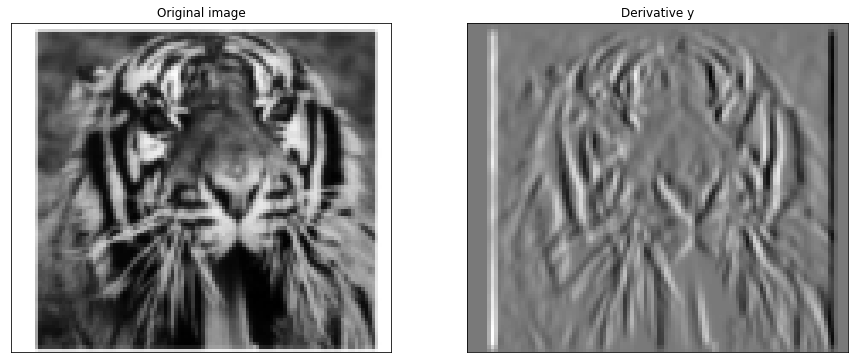

In [7]:
mask_y2=np.array([[-1,0,1],[-1,0,1],[-1,0,1]]) #invert y axis
tigre_y22=ndimage.convolve(tigre_f,mask_y2)

visualize2(tigre_f, tigre_y22, 'Original image', 'Derivative y')

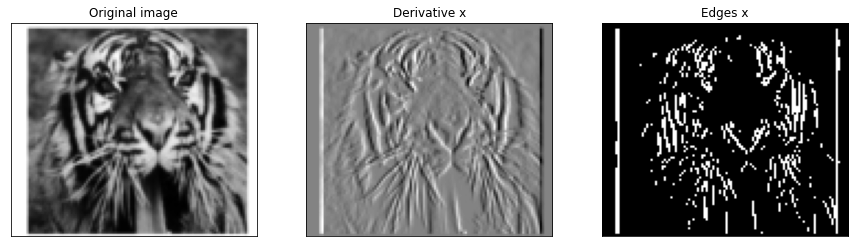

In [8]:
tigre_xb=tigre_x.copy()
thr=0.2

tigre_xb[np.abs(tigre_x)>thr]=1
tigre_xb[np.abs(tigre_x)<=thr]=0

visualize3(tigre_f,tigre_x, tigre_xb, 'Original image', 'Derivative x', 'Edges x')


Do we get all edges?

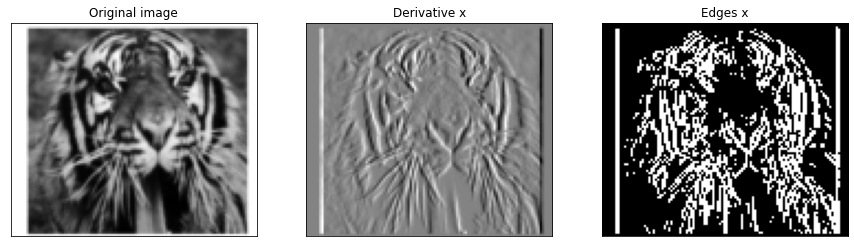

In [13]:
tigre_xb=tigre_x.copy()
thr=0.1

tigre_xb[np.abs(tigre_x)>thr]=1
tigre_xb[np.abs(tigre_x)<=thr]=0

#visualize
visualize3(tigre_f,tigre_x, tigre_xb, 'Original image', 'Derivative x', 'Edges x')


How to determine better the threshold?

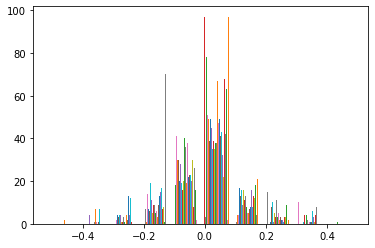

In [14]:
plt.hist(tigre_x)
plt.show()

So thr=0.1 probably is a good choice.

Let's define the Prewitt and the Sobel masks:

In [15]:
prewitt_x=np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
prewitt_y=np.transpose(prewitt_x)

In [16]:
sobel_x=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
sobel_y=np.transpose(sobel_x)

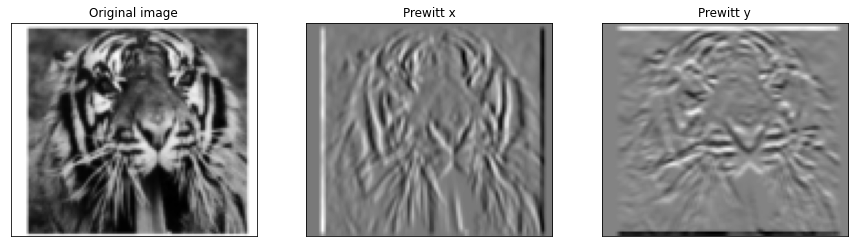

In [17]:
tigre_px=ndimage.convolve(tigre_f,prewitt_x)
tigre_py=ndimage.convolve(tigre_f,prewitt_y)

#visualize
visualize3(tigre_f,tigre_px, tigre_py, 'Original image', 'Prewitt x', 'Prewitt y')


Compare the result of Prewitt with the single mask [[-1,1]]

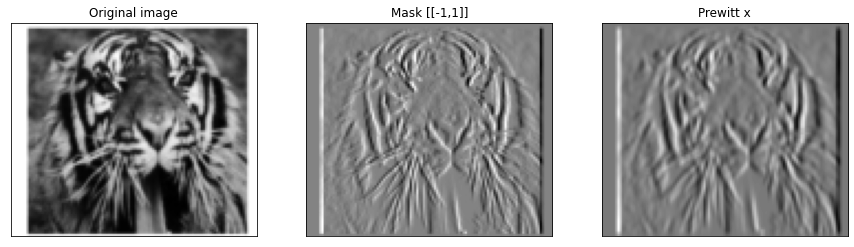

In [18]:

#visualize
visualize3(tigre_f,tigre_x, tigre_px, 'Original image', 'Mask [[-1,1]]', 'Prewitt x')


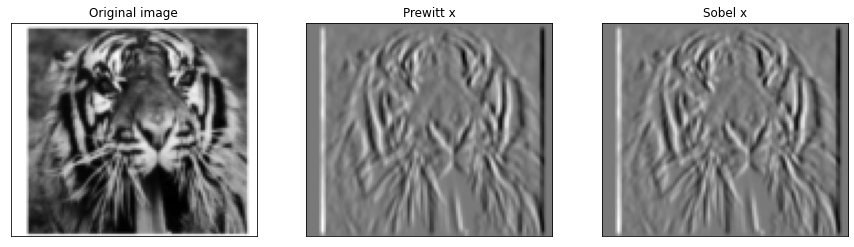

In [21]:
tigre_sx=ndimage.convolve(tigre_f,sobel_x)
tigre_sy=ndimage.convolve(tigre_f,sobel_y)

#visualize
visualize3(tigre_f,tigre_px, tigre_sx, 'Original image', 'Prewitt x', 'Sobel x')


What is the alternative of finding the Sobel edges?

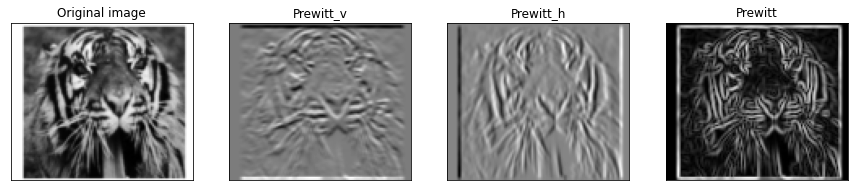

In [22]:
from skimage import filters 

tigre_px2=filters.prewitt_h(tigre_f)
tigre_py2=filters.prewitt_v(tigre_f)
tigre_p2=filters.prewitt(tigre_f)

visualize4(tigre_f,tigre_px2, tigre_py2, tigre_p2, 'Original image', 'Prewitt_v', 'Prewitt_h', 'Prewitt')


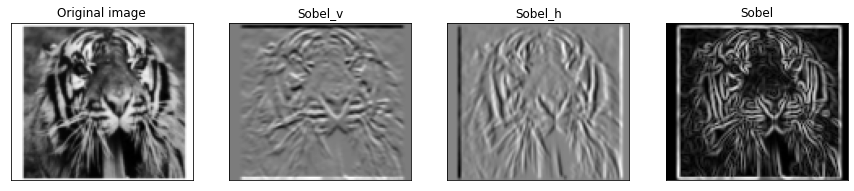

In [23]:
from skimage import filters 

tigre_sx2=filters.sobel_h(tigre_f)
tigre_sy2=filters.sobel_v(tigre_f)
tigre_s2=filters.sobel(tigre_f)

visualize4(tigre_f,tigre_sx2, tigre_sy2, tigre_s2, 'Original image', 'Sobel_v', 'Sobel_h', 'Sobel')


How to find the second derivatives?

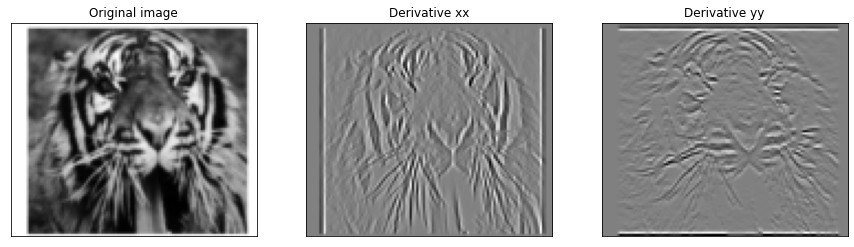

In [24]:
mask_2dx=np.array([[1,-2,1]])
mask_2dy=np.transpose(mask_2dx)
tigre_xx=ndimage.convolve(tigre_f,mask_2dx)
tigre_yy=ndimage.convolve(tigre_f,mask_2dy)

visualize3(tigre_f,tigre_xx, tigre_yy, 'Original image', 'Derivative xx', 'Derivative yy')


How to define the Laplacian mask?

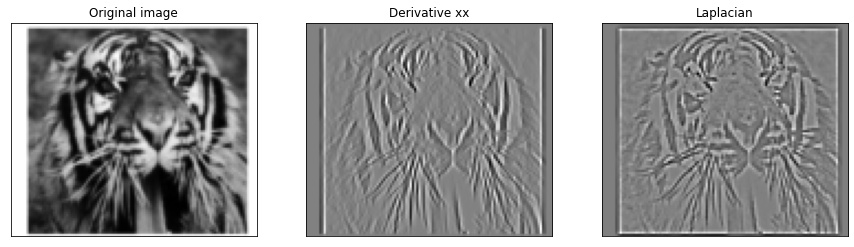

In [25]:
mask_lapl=np.array([[1,4,1],[4,-20,4],[1,4,1]])
tigre_lapl=ndimage.convolve(tigre_f,mask_lapl)

visualize3(tigre_f,tigre_xx, tigre_lapl, 'Original image', 'Derivative xx', 'Laplacian')


How to get image derivatives by a Gaussian filter?

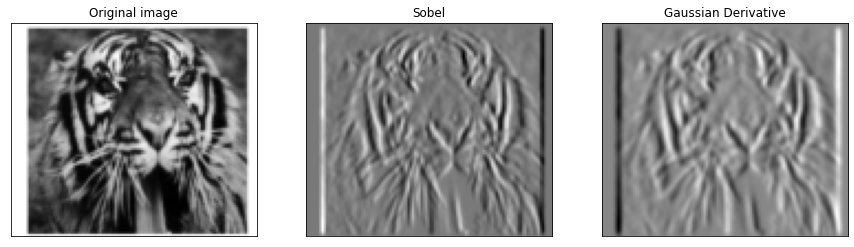

In [26]:
from scipy.ndimage import gaussian_filter

tigre_gx=gaussian_filter(tigre_f,1,order=[0,1])

visualize3(tigre_f,tigre_sx, tigre_gx, 'Original image', 'Sobel', 'Gaussian Derivative')


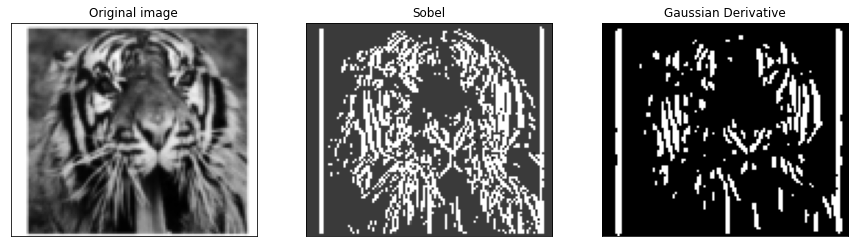

In [27]:
thr=0.1

tigre_sb=tigre_x.copy()
tigre_sb[np.abs(tigre_sx)>thr]=1
tigre_sb[np.abs(tigre_x)<=thr]=0

tigre_gb=tigre_x.copy()
tigre_gb[np.abs(tigre_gx)>thr]=1
tigre_gb[np.abs(tigre_gx)<=thr]=0

visualize3(tigre_f,tigre_sb, tigre_gb, 'Original image', 'Sobel', 'Gaussian Derivative')



How the sigma parameter affects the derivative? 

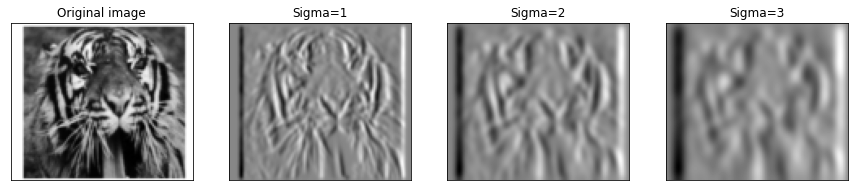

In [28]:
tigre_gx1=gaussian_filter(tigre_f,1,order=[0,1])
tigre_gx2=gaussian_filter(tigre_f,2,order=[0,1])
tigre_gx3=gaussian_filter(tigre_f,3,order=[0,1])

visualize4(tigre_f,tigre_gx1, tigre_gx2,tigre_gx3, 'Original image',  'Sigma=1', 'Sigma=2', 'Sigma=3')




Compute the Laplacian with different sigma parameters:

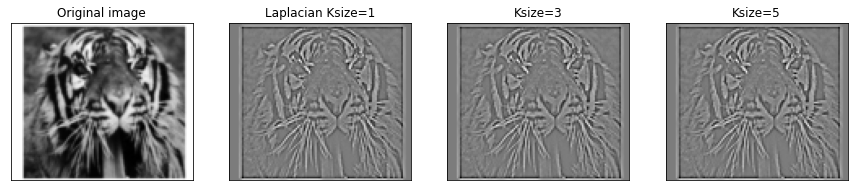

In [29]:
tigre_l1=filters.laplace(tigre_f)
tigre_l3=filters.laplace(tigre_f,3)
tigre_l5=filters.laplace(tigre_f,5)

visualize4(tigre_f,tigre_l1, tigre_l3,tigre_l5, 'Original image',  'Laplacian Ksize=1', 'Ksize=3', 'Ksize=5')



What is the Canny edge detector? What are its parameters?

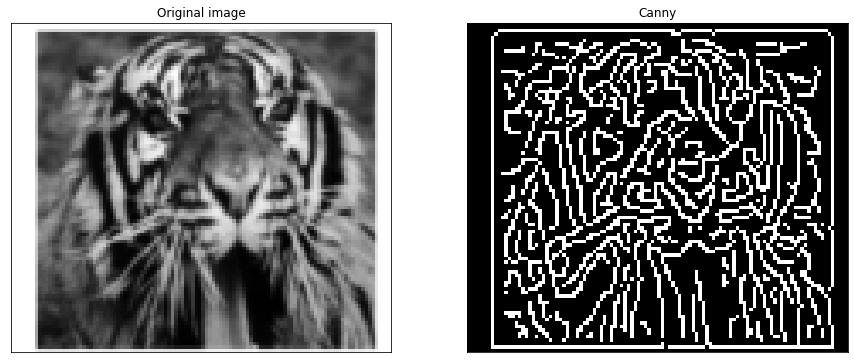

In [30]:
from skimage import feature

tigre_c=feature.canny(tigre_f)

visualize2(tigre_f,tigre_c, 'Original image',  'Canny')




Testing with different sigma parameters

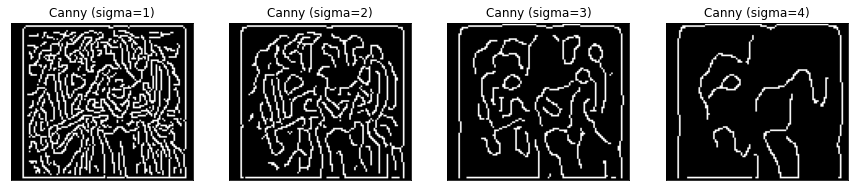

In [31]:
tigre_c1=feature.canny(tigre_f, sigma=1)
tigre_c3=feature.canny(tigre_f, sigma=2)

tigre_c5=feature.canny(tigre_f, sigma=3)
tigre_c9=feature.canny(tigre_f, sigma=4)

visualize4(tigre_c1,tigre_c3,tigre_c5,tigre_c9,'Canny (sigma=1)','Canny (sigma=2)','Canny (sigma=3)','Canny (sigma=4)')

Explain the following effect:

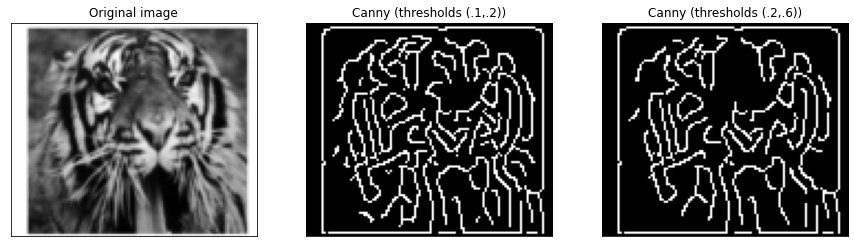

In [32]:
tigre_c512=feature.canny(tigre_f, sigma=2, low_threshold=0.1, high_threshold=0.2)
tigre_c526=feature.canny(tigre_f, sigma=2, low_threshold=0.2, high_threshold=0.3)

visualize3(tigre_f,tigre_c512,tigre_c526,'Original image','Canny (thresholds (.1,.2))','Canny (thresholds (.2,.6))')

Let's overlap the contours in order to better map them to the image

(97, 112) (97, 112)


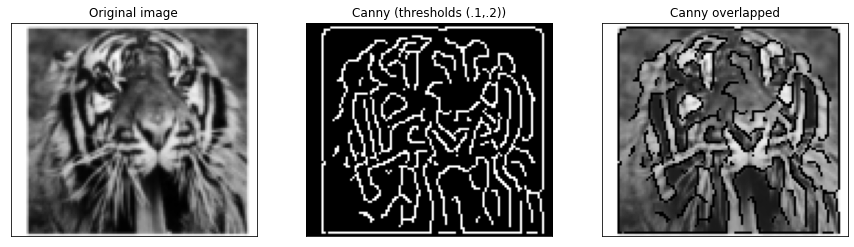

In [33]:
tigre_cim=tigre_f.copy()
print(tigre_cim.shape, tigre_c512.shape)

tigre_cim[tigre_c512]=0

visualize3(tigre_f,tigre_c512,tigre_cim,'Original image','Canny (thresholds (.1,.2))','Canny overlapped')

What do you expect to be the edges of a color image? Test it on the logo.png image

(575, 523, 4)


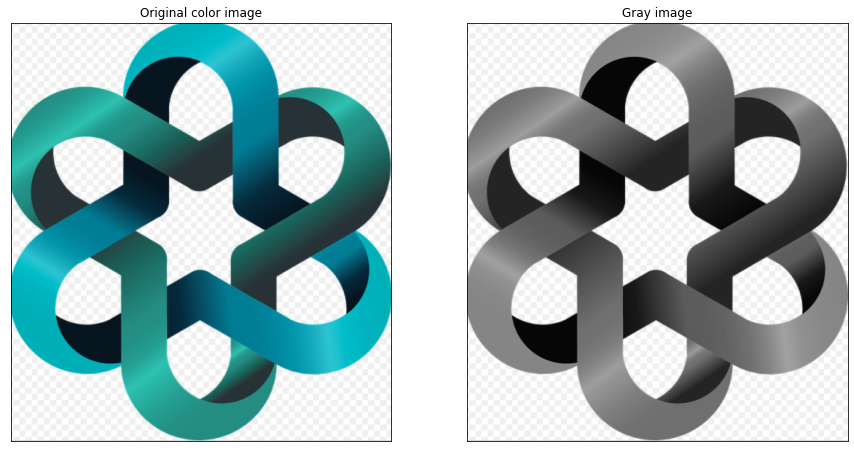

In [34]:
logo=io.imread('images/logo.png')
print(logo.shape)

logo=rgba2rgb(logo)
logo_gr=rgb2gray(logo)

visualize2(logo, logo_gr, 'Original color image', 'Gray image')

In [35]:
logo_canny=feature.canny(logo_gr, sigma=5)

Explain and correct the problem!

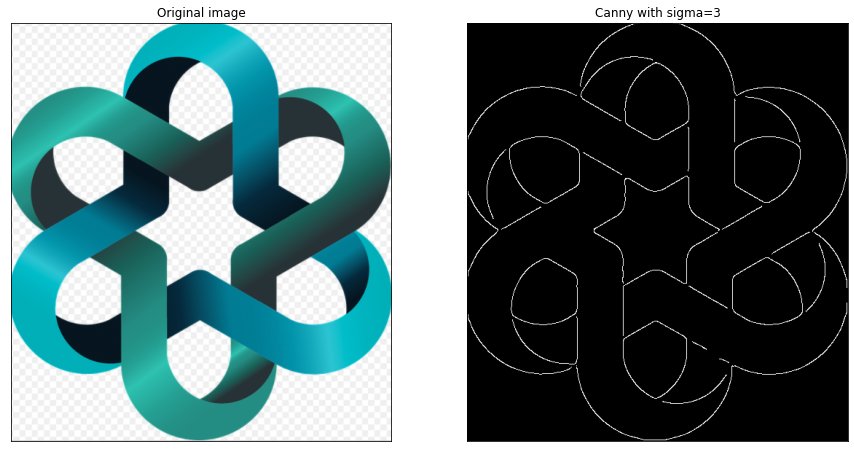

In [36]:
logo_canny=feature.canny(logo_gr, sigma=3)
visualize2(logo,logo_canny, 'Original image', 'Canny with sigma=3')

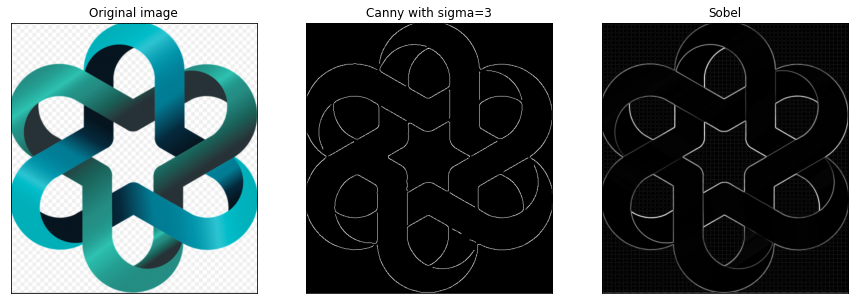

In [37]:
logo_sobel=filters.sobel(logo_gr)
visualize3(logo,logo_canny, logo_sobel, 'Original image', 'Canny with sigma=3', 'Sobel')

In [38]:
import math

logo_gaussian01=gaussian_filter(logo_gr,sigma=2,order=[0,1])
logo_gaussian10=gaussian_filter(logo_gr,sigma=2,order=[1,0])

def magnitude(m1,m2):
    res=np.zeros(m1.shape)
    for i in range(m1.shape[0]):
        for j in range(m1.shape[1]):
            res[i,j]=math.sqrt(m1[i,j]*m1[i,j]+m2[i,j]*m2[i,j])
            
    return(res)

logo_gaussian=magnitude(logo_gaussian01,logo_gaussian10)

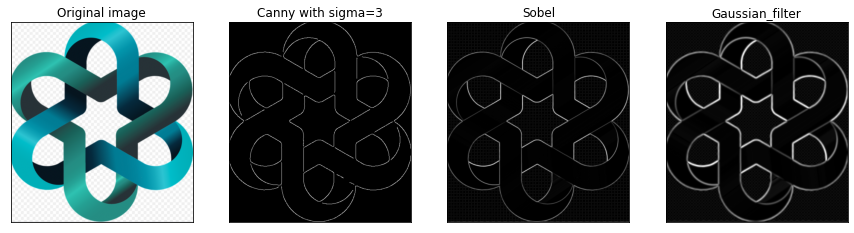

In [39]:
visualize4(logo,logo_canny, logo_sobel, np.abs(logo_gaussian), 'Original image', 'Canny with sigma=3', 'Sobel', 'Gaussian_filter')

(114, 111, 3)


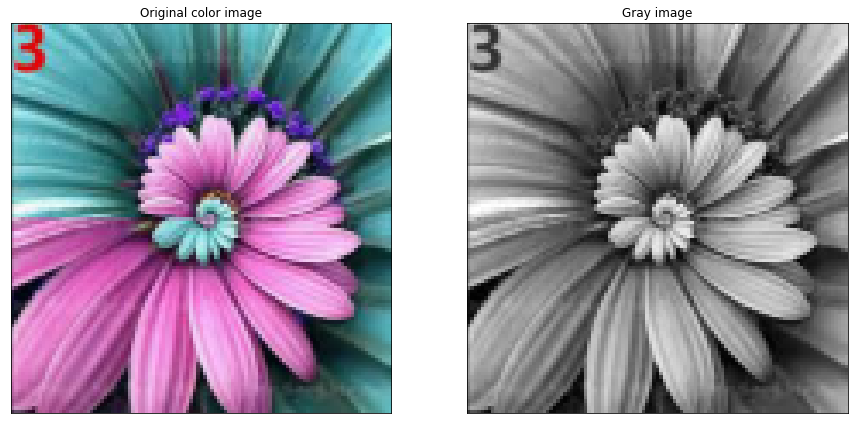

In [114]:
#Compare the contours on the flowers.jpeg

flowers=io.imread('images/flowers.jpeg')

flowers=rescale(flowers,.5, multichannel=True)
flowers_gr=rgb2gray(flowers)
print(flowers.shape)

visualize2(flowers, flowers_gr, 'Original color image', 'Gray image')

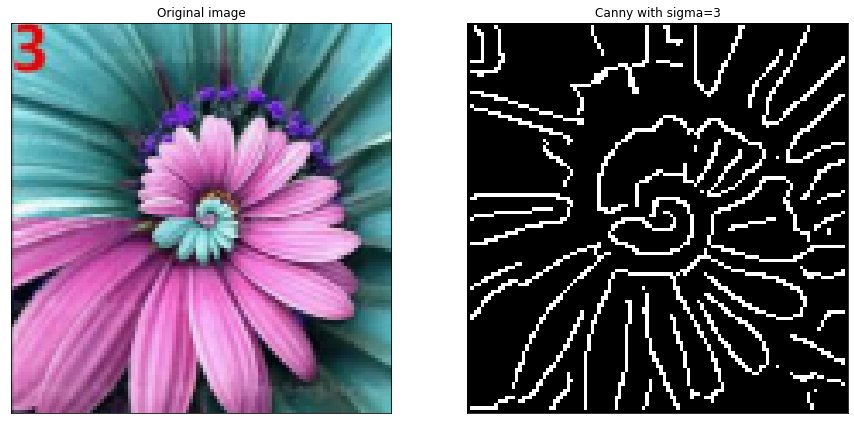

In [115]:
flowers_canny=feature.canny(flowers_gr, sigma=2)
visualize2(flowers,flowers_canny, 'Original image', 'Canny with sigma=3')

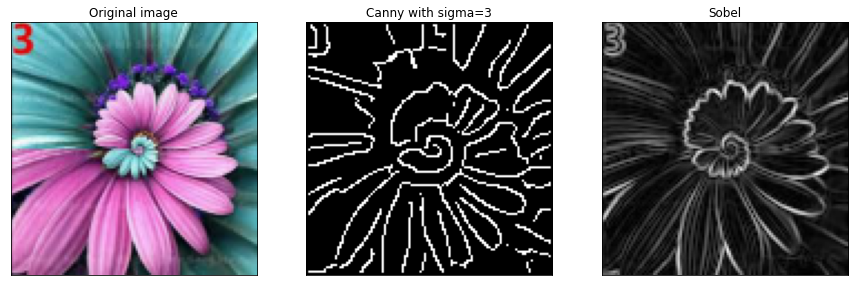

In [116]:
flowers_sobel=filters.sobel(flowers_gr)
visualize3(flowers,flowers_canny, flowers_sobel, 'Original image', 'Canny with sigma=3', 'Sobel')

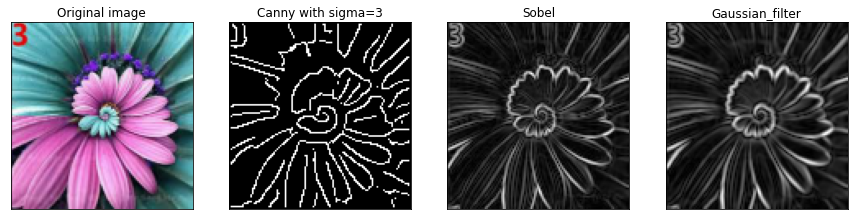

In [117]:
flowers_gaussian01=gaussian_filter(flowers_gr,sigma=1,order=[0,1])
flowers_gaussian10=gaussian_filter(flowers_gr,sigma=1,order=[1,0])
flowers_gaussian=magnitude(flowers_gaussian01,flowers_gaussian10)

visualize4(flowers,flowers_canny, flowers_sobel, flowers_gaussian, 'Original image', 'Canny with sigma=3', 'Sobel', 'Gaussian_filter')

What is the difference between different edge detectors? 

**Exercise:** Introduce noise in the image and show how it affects different edge detectors.